In [52]:
import pandas as pd
import matplotlib as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
df=pd.read_csv("D:\UIS-LEARN\Spring 2016/breast_cancer.csv")

df.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [53]:
df.malignant.value_counts()

0    458
1    241
Name: malignant, dtype: int64

In [54]:
df.malignant.describe()

count    699.000000
mean       0.344778
std        0.475636
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: malignant, dtype: float64

In [83]:
df.count()

clump_thickness             699
uniformity_of_cell_size     699
uniformity_of_cell_shape    699
marginal_adhesion           699
epithelial_cell_size        699
bare_nuclei                 699
bland_chromatin             699
normal_nucleoli             699
mitoses                     699
dtype: int64

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
X = df
y = X.pop("malignant")

In [57]:
X.describe()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,349.000000,1071704.098712,4.417740,3.134478,3.207439,2.806867,3.216023,3.440629,3.437768,2.866953,1.589413
std,201.928205,617095.729819,2.815741,3.051459,2.971913,2.855379,2.214300,3.665507,2.438364,3.053634,1.715078
min,0.000000,61634.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000
25%,174.500000,870688.500000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,349.000000,1171710.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,523.500000,1238298.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,698.000000,13454352.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [58]:
X.count()

Unnamed: 0                  699
id number                   699
clump_thickness             699
uniformity_of_cell_size     699
uniformity_of_cell_shape    699
marginal_adhesion           699
epithelial_cell_size        699
bare_nuclei                 699
bland_chromatin             699
normal_nucleoli             699
mitoses                     699
dtype: int64

In [59]:
df.count()

Unnamed: 0                  699
id number                   699
clump_thickness             699
uniformity_of_cell_size     699
uniformity_of_cell_shape    699
marginal_adhesion           699
epithelial_cell_size        699
bare_nuclei                 699
bland_chromatin             699
normal_nucleoli             699
mitoses                     699
dtype: int64

In [60]:

X.uniformity_of_cell_shape.value_counts()

1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: uniformity_of_cell_shape, dtype: int64

In [61]:
X.uniformity_of_cell_size.value_counts()

1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: uniformity_of_cell_size, dtype: int64

In above data,the Unamed column is just an ID like index,so let us drop both id number and unnamed column,as they are not important

In [62]:
X.drop(["Unnamed: 0", "id number"], axis=1, inplace=True)

Lets us split the data with only single split holdout

In [63]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

Let us fit the X_train  and y_train into clasifier model

In [64]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [65]:
accuracy = accuracy_score(y_test, model.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.928571428571


In [66]:
roc = roc_auc_score(y_test, model.predict(X_test))
print "C-stat: ", roc

C-stat:  0.928767702389


Here we got AUC of 92%,Let us find better estimator model using grid search

==.Grid Search

In [67]:
### Grid Search
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)
                              

In [68]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [69]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
rfc_best=estimator.best_estimator_

Here we got best estimator tht fitting the model when we take attributes as 
n_estimators=400,n_jobs=1,max_features='auto', max_leaf_nodes=None,

==>Accuracy Score

In [71]:
accuracy = accuracy_score(y_test, rfc_best.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.921428571429


Here we got 92% accuracy

In [72]:
y_hat =rfc_best.predict(X_test)

In [73]:
y_hat

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0], dtype=int64)

In [74]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)
        

0.921428571429


==>Precision and Recall

In [75]:
print classification_report(y_test, rfc_best.predict(X_test))

             precision    recall  f1-score   support

          0       0.94      0.93      0.93        83
          1       0.90      0.91      0.90        57

avg / total       0.92      0.92      0.92       140



==>Precision:   The model will correctly identify 92% who have malignant.  Conversely there is a 8% chance it will identify a non-malignant   (tp / tp+fp)

Recall:  Of the people the model identified as having breat cancer, 92% of them will actually have breat cancer.  (tp / tp + fn)

ie
 we can observe that Precision and Recall rates are high(0.92). So, we can say that our model has  low false positive rate and false negative rate.
That is, our model  8% of the times may miss a malignant case.
92% retrieved results are correctly predicted of having malignant

In [76]:
print confusion_matrix(y_test,rfc_best.predict(X_test))

[[77  6]
 [ 5 52]]


In [77]:
accuracy = accuracy_score(y_test, rfc_best.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.921428571429


==>AUC score

In [78]:
roc = roc_auc_score(y_test, rfc_best.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.971464806595


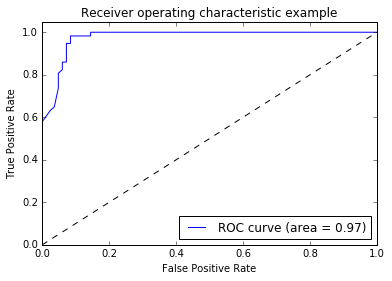

In [79]:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# K-Fold Cross Validation

The advantage of using kfold over hold-out is that in
kflod- all observations are used for both training and validation, and each observation is used for validation exactly once


Split the data into K chunks
Train K models, retain a chunk for testing and use the other K-1 chunks for training.
The result is K scores, which can be combined into a single average score for the model

--->We are splitting our data into 10 chunks

In [80]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(rfc_best, X, y, cv=10)

In [81]:
scores

array([ 0.92957746,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.98571429,  0.97142857,  0.98571429,  0.98550725,  0.98550725])

In [82]:
import math
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.968631 +/-  0.017444
95 percent probability that if this experiment were repeated over and over the average score would be between 0.951187 and 0.986075


2. Report on how the K-Fold CV score compared to your single holdout AUC

So, actual AUC would be between  0.95 and 0.98. Average K-Fold CV score (AUC) is 0.968 after impementing on 10 chunks of data.
Our single holdout AUC score was 0.972. But, after K-Fold Cross Validation it is clear that our model was also in the range.



3.Write a short description of your model's performance.   Include AUC, Accuracy, Precision, and Recall in your discussion.

==>Model Performance for Single Hold out
-------------------------------------------
--> Accuracy of the model: 92%
--> Precision and Recall are : 0.92(that is good)
--> AUC score is 97.1%. So, It is a good model.
From the above,Precision and Recall rates are high(0.92).Here we may say that 92% of predicted results are accurate. So,our model has low false positive rate and false negative rate.So our classifier is returning accurate results ie high precision and also positive results(high recall)
Using single holdout ,we are able to fit our model to 20% of the data we have,which may not sufficient as some important data might missing
and our model may not perform well in future,So thereby using Kfold validation technique gives us oppurtunity to fit our model on whole data
We got the average score of 96.8% and it can be in range of 0.95 and 0.98
